# Credit Card Acceptance Model

https://www.kaggle.com/datasets/rohitudageri/credit-card-details/data

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("Credit_card.csv")
labels = pd.read_csv("Credit_card_label.csv")
df = pd.merge(df, labels, on='Ind_ID')



In [4]:
df.head(5)

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
df.count()

Ind_ID             1548
GENDER             1541
Car_Owner          1548
Propert_Owner      1548
CHILDREN           1548
Annual_income      1525
Type_Income        1548
EDUCATION          1548
Marital_status     1548
Housing_type       1548
Birthday_count     1526
Employed_days      1548
Mobile_phone       1548
Work_Phone         1548
Phone              1548
EMAIL_ID           1548
Type_Occupation    1060
Family_Members     1548
label              1548
dtype: int64

In [6]:
df.isna().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [7]:
df = df.drop(columns=["Type_Occupation"])

Consider dropping Type_Occupation

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Ind_ID          1548 non-null   int64  
 1   GENDER          1541 non-null   object 
 2   Car_Owner       1548 non-null   object 
 3   Propert_Owner   1548 non-null   object 
 4   CHILDREN        1548 non-null   int64  
 5   Annual_income   1525 non-null   float64
 6   Type_Income     1548 non-null   object 
 7   EDUCATION       1548 non-null   object 
 8   Marital_status  1548 non-null   object 
 9   Housing_type    1548 non-null   object 
 10  Birthday_count  1526 non-null   float64
 11  Employed_days   1548 non-null   int64  
 12  Mobile_phone    1548 non-null   int64  
 13  Work_Phone      1548 non-null   int64  
 14  Phone           1548 non-null   int64  
 15  EMAIL_ID        1548 non-null   int64  
 16  Family_Members  1548 non-null   int64  
 17  label           1548 non-null   i

In [9]:
import category_encoders.one_hot as CE

EDA_df = df.copy()

categories = ["EDUCATION", "Marital_status", "Housing_type", "Car_Owner", "GENDER", "Propert_Owner", "Type_Income"]
cat_df = EDA_df[categories]
ohe = CE.OneHotEncoder(use_cat_names=True)
cat_df = ohe.fit_transform(cat_df)
columns_to_drop = ["EDUCATION_Secondary / secondary special", "Marital_status_Widow", "Housing_type_House / apartment", "Car_Owner_N", "GENDER_M", "Propert_Owner_N", "Type_Income_Pensioner"]
cat_df = cat_df.drop(columns=columns_to_drop)

for col in cat_df.keys():
    EDA_df[col] = cat_df[col].copy()
EDA_df = EDA_df.drop(columns=categories)
EDA_df.head(15)

Employed_days = []

for row in EDA_df.iterrows():
    if row[1].Employed_days > 0:
        Employed_days.append(0)
    else:
        Employed_days.append(row[1].Employed_days)
EDA_df["Employed_days"] = Employed_days


In [8]:
EDA_df.keys()

Index(['Ind_ID', 'CHILDREN', 'Annual_income', 'Birthday_count',
       'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID',
       'Family_Members', 'label', 'EDUCATION_Higher education',
       'EDUCATION_Lower secondary', 'EDUCATION_Incomplete higher',
       'EDUCATION_Academic degree', 'Marital_status_Married',
       'Marital_status_Single / not married', 'Marital_status_Civil marriage',
       'Marital_status_Separated', 'Housing_type_With parents',
       'Housing_type_Rented apartment', 'Housing_type_Municipal apartment',
       'Housing_type_Co-op apartment', 'Housing_type_Office apartment',
       'Car_Owner_Y', 'GENDER_F', 'GENDER_nan', 'Propert_Owner_Y',
       'Type_Income_Commercial associate', 'Type_Income_Working',
       'Type_Income_State servant'],
      dtype='object')

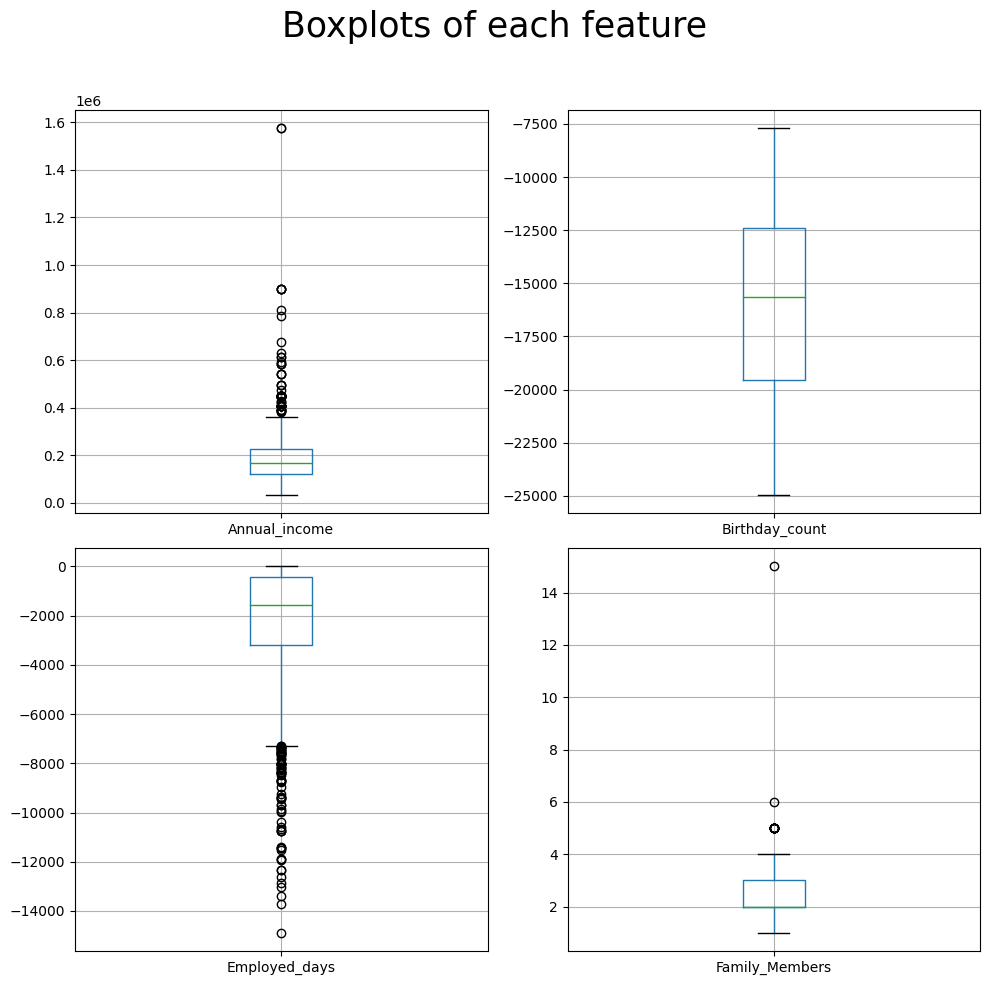

In [10]:
numeric_features = ['Annual_income', 'Birthday_count', "Employed_days", "Family_Members"]

rows = ((int(len(numeric_features)/2)))
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10, 10))

for i, column in enumerate(numeric_features):
    if column != "label":
        EDA_df.boxplot([column], ax=axes[int(i/2),int(i%2)])

fig.tight_layout()
fig.suptitle("Boxplots of each feature", size=25)
fig.subplots_adjust(top=0.88)

plt.show()

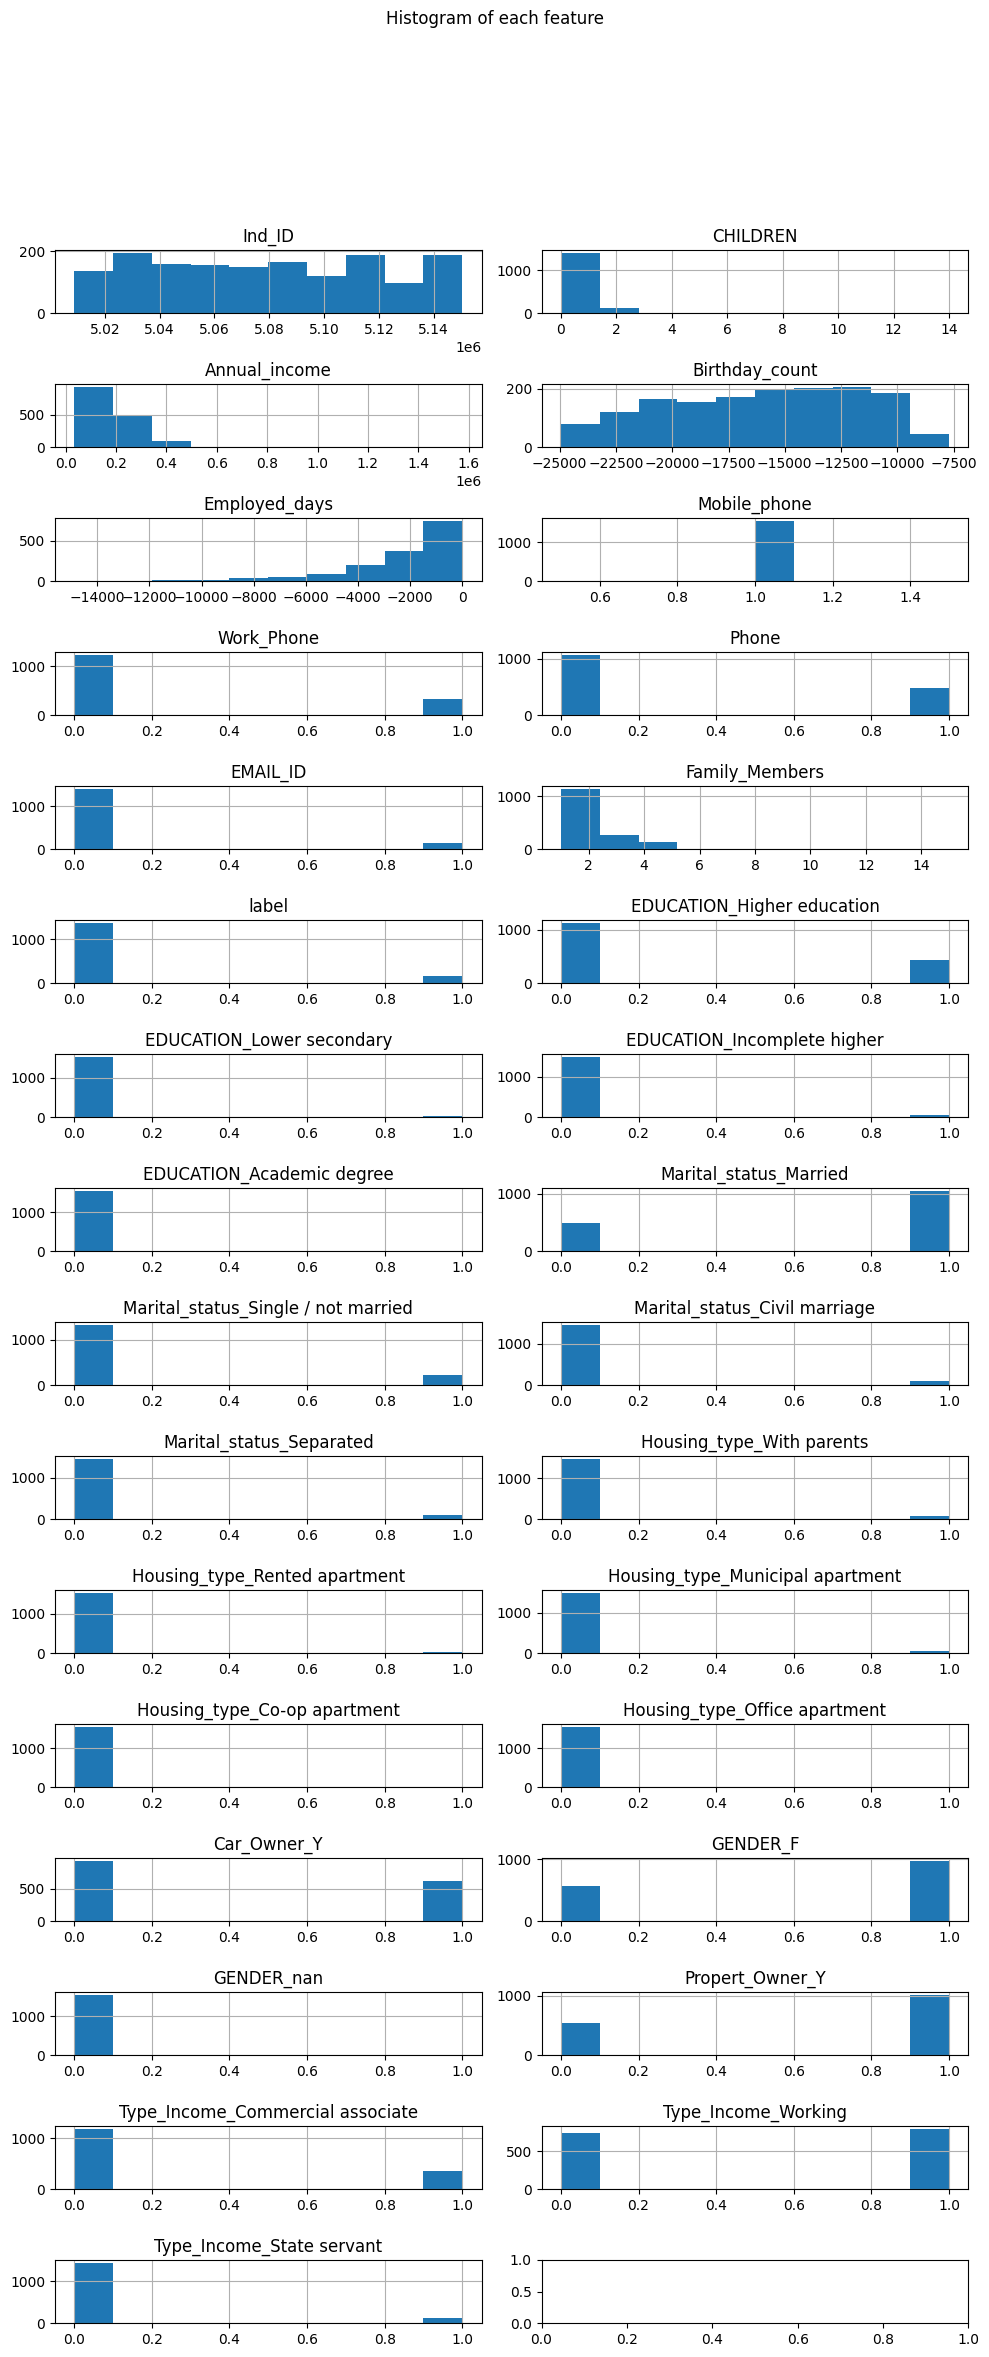

In [11]:

numeric_features = EDA_df.keys()
#numeric_features = ['Annual_income', 'Birthday_count', "Employed_days", "Family_Members"]

rows = ((int(len(numeric_features)/2+1)))
fig, axes = plt.subplots(nrows=rows, ncols=2, figsize=(10, 24))

for i, column in enumerate(numeric_features):
    EDA_df.hist([column], ax=axes[int(i/2),int(i%2)])

fig.tight_layout()
fig.suptitle("Histogram of each feature", size=12)
fig.subplots_adjust(top=0.88)

plt.show()

Missing values from birthday count can use normal inpute.

Preprocessing

Text(0.5, 1.0, 'Correlation Heatmap')

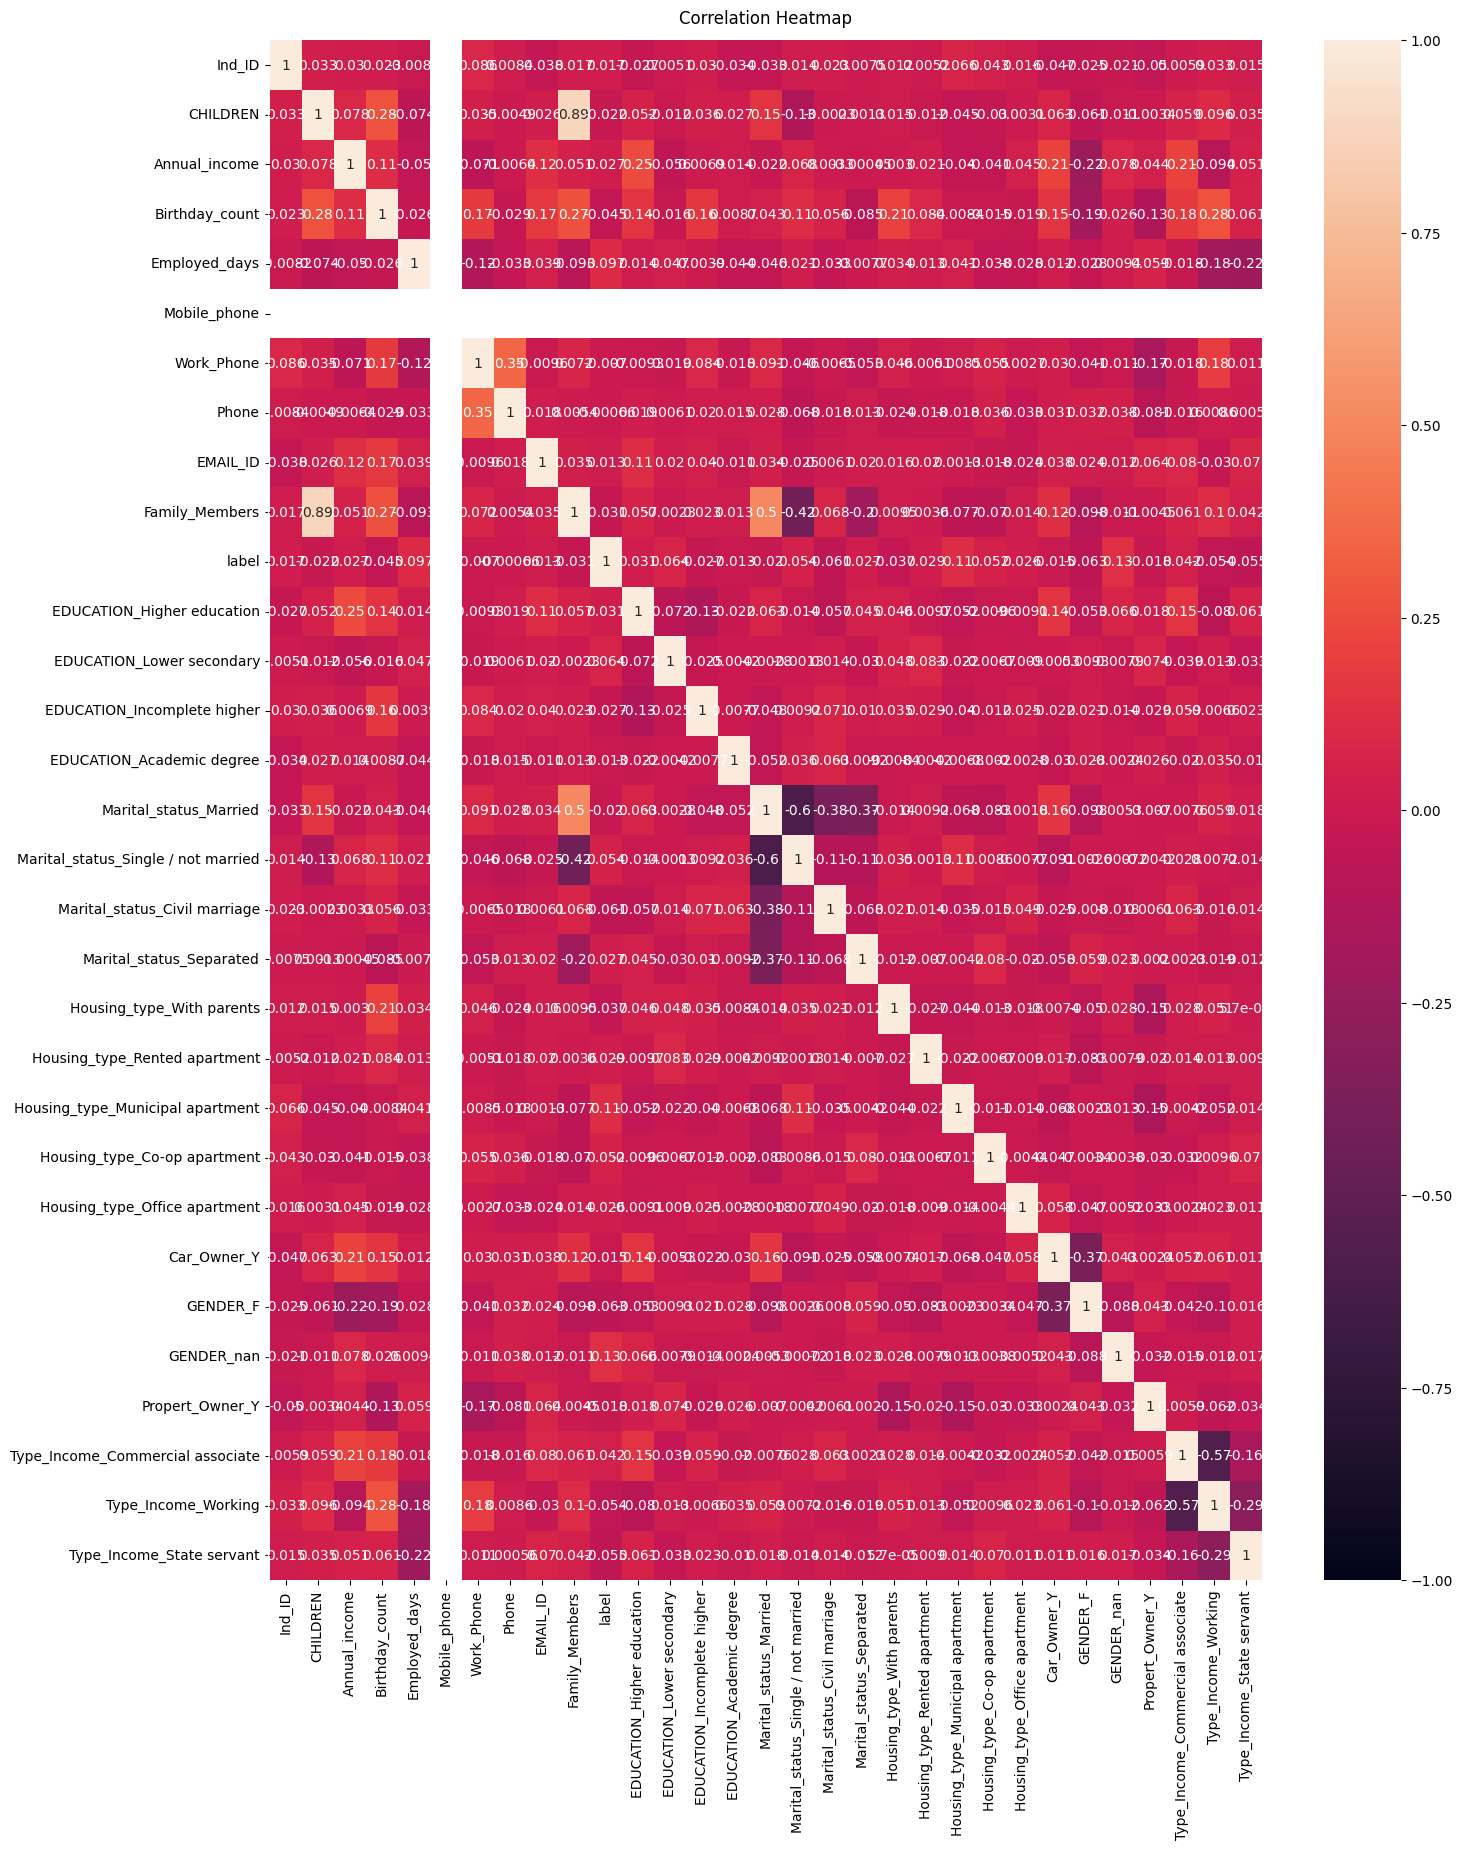

In [12]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 20))

import seaborn as sns

# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(EDA_df.corr(), vmin=-1, vmax=1, annot=True)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

In [13]:
from sklearn import preprocessing
from sklearn import pipeline
from sklearn import compose
from sklearn import impute



df = pd.read_csv("Credit_card.csv")
labels = pd.read_csv("Credit_card_label.csv")
df = pd.merge(df, labels, on='Ind_ID')
df["GENDER"] = df["GENDER"].fillna(df["GENDER"].mode().iloc[0])

Y = df["label"]
X = df

KNN_features = ["Annual_income"]
KNN_index = [df.columns.get_loc(c) for c in KNN_features if c in df]
mean_features = ["Birthday_count"]
mean_index = [df.columns.get_loc(c) for c in mean_features if c in df]


imputer = compose.ColumnTransformer(
    [
        ('MeanImputer', impute.SimpleImputer(missing_values=np.nan, strategy='mean'), mean_index),
        ('KNNImputer', impute.KNNImputer(missing_values=np.nan, n_neighbors=2), KNN_index)
    ],
    remainder = "passthrough"
)

# transformer for categorical features
categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', "CHILDREN", "Type_Income", "EDUCATION", "Marital_status", "Housing_type", "Work_Phone", "Phone"]
categorical_index = [df.columns.get_loc(c) for c in categorical_features if c in df]
categorical = compose.ColumnTransformer(
                                        
    [
        ('onehot', preprocessing.OneHotEncoder(drop='first',handle_unknown = 'ignore'), categorical_index),
        ('StandardScaler', preprocessing.StandardScaler(with_mean=False), categorical_index)
    ],
    remainder = "passthrough"
)

# transformer for numerical features
numeric_features = ['Annual_income', 'Birthday_count', "Employed_days", "Family_Members"]
numeric_index = [df.columns.get_loc(c) for c in numeric_features if c in df]
numeric = compose.ColumnTransformer(
    [
        ('StandardScaler', preprocessing.StandardScaler(with_mean=False), numeric_index)
    ],
    remainder = "drop"
)

# combine them in a single ColumnTransformer
preprocessor = pipeline.Pipeline(
    [
        ("Impute", imputer),
        ("Categorical Features", categorical),
        ("Numerical Features", numeric)
    ]
)

In [14]:
df.isna().sum()

Ind_ID               0
GENDER               0
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [15]:
# transformer for categorical features

df = pd.read_csv("Credit_card.csv")
labels = pd.read_csv("Credit_card_label.csv")
df = pd.merge(df, labels, on='Ind_ID')
df = df.drop(columns=["Ind_ID", "Type_Occupation", "Mobile_phone"])

df["GENDER"] = df["GENDER"].fillna(df["GENDER"].mode().iloc[0])
df["Birthday_count"] = df["Birthday_count"].fillna(df["Birthday_count"].mean())
df = df.dropna()

Y = df["label"]
X = df

categorical_features = ['GENDER', 'Car_Owner', 'Propert_Owner', "CHILDREN", "Type_Income", "EDUCATION", "Marital_status", "Housing_type", "Work_Phone", "Phone"]
categorical_transformer = pipeline.Pipeline(
    [
        ('onehot', preprocessing.OneHotEncoder(drop='first',handle_unknown = 'ignore')),
        ('StandardScaler', preprocessing.StandardScaler(with_mean=False))
    ]
)
# transformer for numerical features
numeric_features = ['Annual_income', 'Birthday_count', "Employed_days", "Family_Members"]
numeric_transformer = pipeline.Pipeline(
    [
        ('StandardScaler', preprocessing.StandardScaler(with_mean=False))
    ]
)
# combine them in a single ColumnTransformer
preprocessor = compose.ColumnTransformer(
    [
        ('categoricals', categorical_transformer, categorical_features),
        ('numericals', numeric_transformer, numeric_features)
    ],
    remainder = 'drop' 
)


Pre-processing Pipeline

In [16]:
from sklearn import linear_model
from sklearn import model_selection

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,train_size=0.3, random_state=42)

X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train

model = linear_model.LogisticRegression()

model.fit(X_train_processed, Y_train)
model.score(X_test_processed,Y_test)

c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


0.8885767790262172

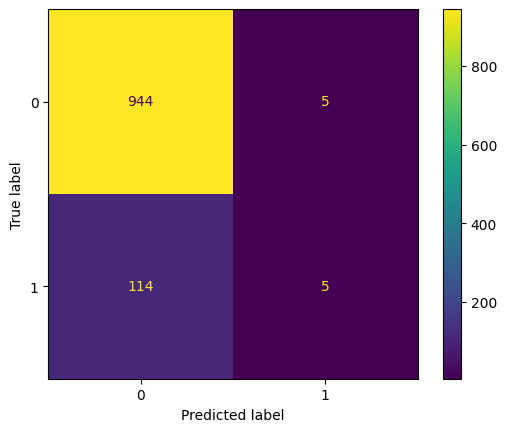

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       949
           1       0.50      0.04      0.08       119

    accuracy                           0.89      1068
   macro avg       0.70      0.52      0.51      1068
weighted avg       0.85      0.89      0.84      1068



In [17]:
from sklearn import metrics

Y_pred = model.predict(X_test_processed)

cm = metrics.confusion_matrix(Y_test, Y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print(metrics.classification_report(Y_test, Y_pred))

c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

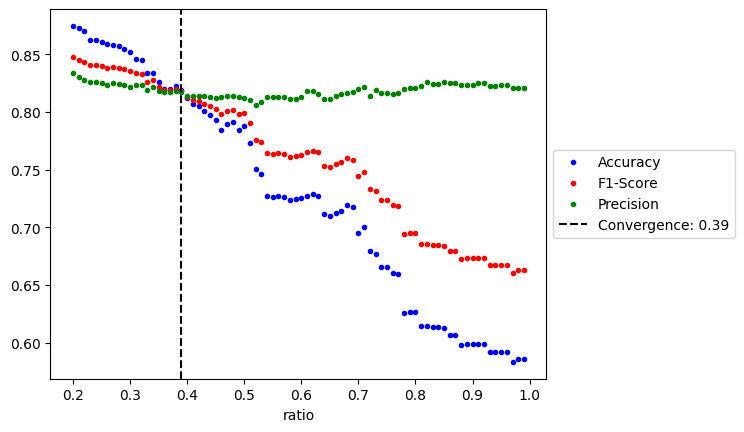

In [18]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn import metrics

scores = []
ratio = []
f1 = []
precision = []

for x in range(20,100):
    undersample = RandomUnderSampler(sampling_strategy = (x/100), random_state=42)
    X_train_processed, Y_train = undersample.fit_resample(X_train_processed, Y_train)
    model = linear_model.LogisticRegression()
    model.fit(X_train_processed, Y_train)
    Y_pred = model.predict(X_test_processed)
    scores.append(model.score(X_test_processed,Y_test))
    ratio.append(x/100)
    f1.append(metrics.f1_score(Y_test, Y_pred, pos_label=1, average='weighted', sample_weight=None))
    precision.append(metrics.precision_score(Y_test, Y_pred, pos_label=1, average='weighted', sample_weight=None))

#Find convergence using minimal distance between each pair of lines

d1 = [] #scores - f1
d2 = [] #f1 - precision
d3 = [] #scores - precision
for i,r in enumerate(ratio):
    d1.append(scores[i] - f1[i])
    d2.append(f1[i]-precision[i])
    d3.append(scores[i]-precision[i]) 


difference = []
for i in range(0,len(d1)):
    difference.append(abs(d1[i])+abs(d2[i])+abs(d3[i]))
min_diff = min(difference)
min_ratio = ratio[difference.index(min_diff)]

plt.figure()
plt.plot(ratio, scores, "b.", label="Accuracy")
plt.plot(ratio, f1, "r.", label="F1-Score")
plt.plot(ratio, precision, "g.", label="Precision")
plt.axvline(x = min_ratio, color = 'k', label = 'Convergence: '+str(min_ratio), linestyle='--')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("ratio")
plt.show()


c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zer

avg f1: 0.20482283507716098


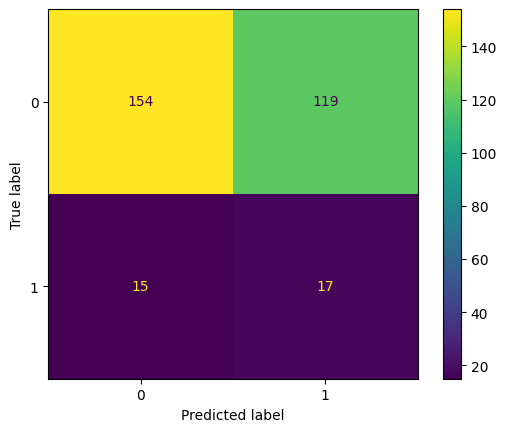

In [46]:
from sklearn import datasets, metrics, model_selection, svm
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
f1 = []
for i in range(0,100):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,train_size=0.8)
    X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
    X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train
    oversample = SMOTE(random_state=42)
    X_train_processed,Y_train = oversample.fit_resample(X_train_processed,Y_train)    
    model = linear_model.LogisticRegression(max_iter=500)
    model.fit(X_train_processed, Y_train)
    model.score(X_test_processed,Y_test)
    Y_pred = model.predict(X_test_processed)
    f1.append(metrics.f1_score(Y_test,Y_pred))
    

print("avg f1: " + str(sum(f1)/100))
cm = metrics.confusion_matrix(Y_test, Y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [5] during transform. These unknown categories will be encoded as all zer

avg f1: 0.2107764968060689


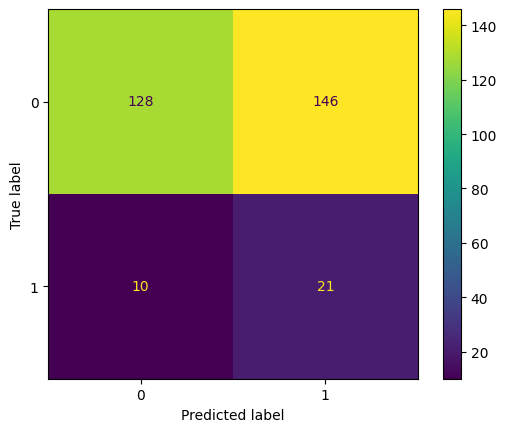

In [50]:
from sklearn import datasets, metrics, model_selection, svm
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN

f1 = []
for i in range(0,100):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,train_size=0.8)
    X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
    X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train
    smote_enn = SMOTEENN()
    X_train_processed, Y_train = smote_enn.fit_resample(X_train_processed, Y_train)
    model = linear_model.LogisticRegression(max_iter=500)
    model.fit(X_train_processed, Y_train)
    model.score(X_test_processed,Y_test)
    Y_pred = model.predict(X_test_processed)
    f1.append(metrics.f1_score(Y_test,Y_pred))
    

print("avg f1: " + str(sum(f1)/100))
cm = metrics.confusion_matrix(Y_test, Y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zer

avg f1: 0.20510686348310292


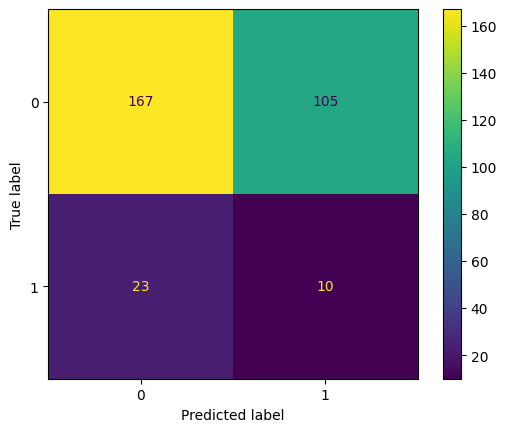

In [51]:
from sklearn import datasets, metrics, model_selection, svm
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

f1 = []
for i in range(0,100):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,train_size=0.8)
    X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
    X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train
    smote_t = SMOTETomek()
    X_train_processed, Y_train = smote_t.fit_resample(X_train_processed, Y_train)
    model = linear_model.LogisticRegression(max_iter=500)
    model.fit(X_train_processed, Y_train)
    model.score(X_test_processed,Y_test)
    Y_pred = model.predict(X_test_processed)
    f1.append(metrics.f1_score(Y_test,Y_pred))
    

print("avg f1: " + str(sum(f1)/100))
cm = metrics.confusion_matrix(Y_test, Y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

K-NN Tuning

c:\Users\Ashley\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:202: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Avg f1 = 0.21705944454602039


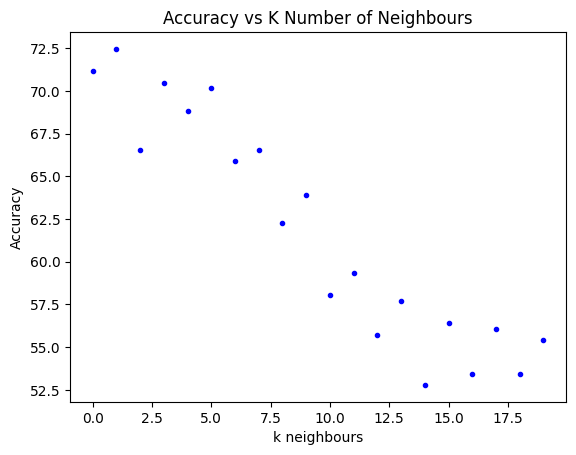

In [65]:
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTEENN

X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X,Y,train_size=0.8, random_state=42)
X_train_processed = preprocessor.fit_transform(X_train) # fit and transform X_train
X_test_processed = preprocessor.transform(X_test) # transform X_test using the model fitted on X_train

undersample = SMOTEENN()
X_train_processed, Y_train = undersample.fit_resample(X_train_processed, Y_train)
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
f1 = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train_processed,Y_train)
    Y_pred= knn.predict(X_test_processed)
    mean_acc[i-1] = metrics.accuracy_score(Y_test, Y_pred)
    f1[i-1] = metrics.f1_score(Y_test, Y_pred)

k = range(0,20)
plt.plot(k, mean_acc*100, "b.")
plt.ylabel("Accuracy")
plt.xlabel("k neighbours")
plt.title("Accuracy vs K Number of Neighbours")

acc_best = 0
best_k = 0
for i in range(0,20):
    if acc_best < mean_acc[i]:
        acc_best = mean_acc[i]
        best_k = i

knn_clf = KNeighborsClassifier(n_neighbors = best_k)

models = []
models.append(("KNN", knn_clf))

print("Avg f1 = " + str(sum(f1)/20))
#from sklearn.naive_bayes import GaussianNB
#from sklearn.svm import SVC

#knn_clf = KNeighborsClassifier()
#NB_clf = GaussianNB()
#SVC_clf = SVC()



Logistic Regression

In [66]:
from sklearn.model_selection import RepeatedStratifiedKFold, GridSearchCV

Log_clf = linear_model.LogisticRegression()

# define models and parameters
Log_clf = linear_model.LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
grid_search = GridSearchCV(estimator=Log_clf, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_processed,Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

models.append(("Logistic", linear_model.LogisticRegression(C=1.0, penalty="l2", solver="newton-cg")))

Best: 0.707023 using {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.701898 (0.028507) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.701706 (0.028917) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.701701 (0.028103) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.701898 (0.027898) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.701706 (0.027931) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.702489 (0.027973) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.703676 (0.029761) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.703481 (0.029393) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.707023 (0.033474) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.700345 (0.037704) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.700345 (0.037704) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.706437 (0.036756) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.680683 (0.038910) wit

Ridge Classifier

In [67]:
from sklearn.linear_model import RidgeClassifier

# define models and parameters
model = RidgeClassifier()
alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
# define grid search
grid = dict(alpha=alpha)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_processed,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

models.append(("Ridge", RidgeClassifier(alpha=0.9)))

Best: 0.711758 using {'alpha': 0.3}
0.711366 (0.040807) with: {'alpha': 0.1}
0.711562 (0.040511) with: {'alpha': 0.2}
0.711758 (0.040383) with: {'alpha': 0.3}
0.711562 (0.040596) with: {'alpha': 0.4}
0.710970 (0.040426) with: {'alpha': 0.5}
0.711167 (0.040637) with: {'alpha': 0.6}
0.710970 (0.040939) with: {'alpha': 0.7}
0.710970 (0.040939) with: {'alpha': 0.8}
0.710969 (0.040750) with: {'alpha': 0.9}
0.710968 (0.040503) with: {'alpha': 1.0}


Support Vector Classifier

In [68]:
from sklearn.svm import SVC

# define model and parameters
model = SVC()
kernel = ['poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale']
# define grid search
grid = dict(kernel=kernel,C=C,gamma=gamma)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_processed,Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

models.append(("SVC", SVC(C=50, gamma='scale', kernel='rbf')))

Best: 0.964608 using {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.961267 (0.013496) with: {'C': 50, 'gamma': 'scale', 'kernel': 'poly'}
0.964608 (0.012360) with: {'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}
0.468708 (0.048777) with: {'C': 50, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.936487 (0.017327) with: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
0.937863 (0.018741) with: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
0.446642 (0.036495) with: {'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.872963 (0.028355) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}
0.855467 (0.036668) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}
0.566606 (0.033085) with: {'C': 1.0, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.726262 (0.027735) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}
0.689111 (0.020590) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
0.579162 (0.010300) with: {'C': 0.1, 'gamma': 'scale', 'kernel': 'sigmoid'}
0.575226 (0.006927) with: {'C': 0.01, 'gamma': 'scale', 

Bagged Trees

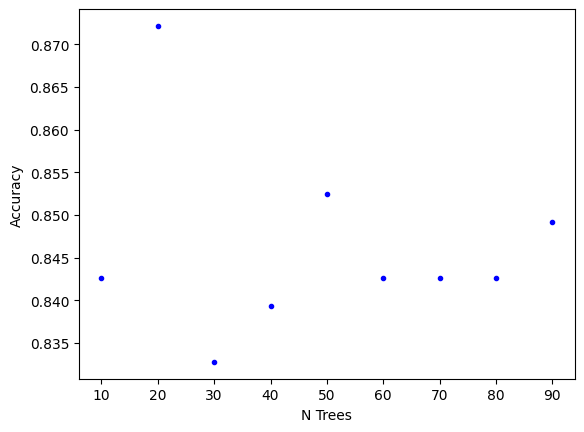

In [69]:
from sklearn.ensemble import BaggingClassifier

# define models and parameters
model = BaggingClassifier()

mean_acc = []
trees = range(10,100,10)
for i in trees:
    m = BaggingClassifier(n_estimators=i)
    m.fit(X_train_processed, Y_train)
    yhat= m.predict(X_test_processed)
    mean_acc.append(metrics.accuracy_score(Y_test, yhat))


best = 0
best_trees = 0
for i in range(0,len(mean_acc)):
    if mean_acc[i] > best:
        best = mean_acc[i]
        best_trees = trees[i]

plt.plot(trees, mean_acc, "b.")
plt.ylabel("Accuracy")
plt.xlabel("N Trees")

models.append(("Bagged_trees", BaggingClassifier(n_estimators=best_trees)))


Random Forest

In [70]:
from sklearn.ensemble import RandomForestClassifier

# define models and parameters
model = RandomForestClassifier()
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
# define grid search
grid = dict(n_estimators=n_estimators,max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_processed, Y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

models.append(("Random_Forest", RandomForestClassifier(n_estimators=100,max_features="log2")))

Best: 0.982503 using {'max_features': 'log2', 'n_estimators': 1000}
0.967547 (0.013871) with: {'max_features': 'sqrt', 'n_estimators': 10}
0.978958 (0.009833) with: {'max_features': 'sqrt', 'n_estimators': 100}
0.978177 (0.008481) with: {'max_features': 'sqrt', 'n_estimators': 1000}
0.968148 (0.012236) with: {'max_features': 'log2', 'n_estimators': 10}
0.979551 (0.009831) with: {'max_features': 'log2', 'n_estimators': 100}
0.982503 (0.007983) with: {'max_features': 'log2', 'n_estimators': 1000}


[Text(1, 0, 'KNN'),
 Text(2, 0, 'Logistic'),
 Text(3, 0, 'Ridge'),
 Text(4, 0, 'SVC'),
 Text(5, 0, 'Bagged_trees'),
 Text(6, 0, 'Random_Forest')]

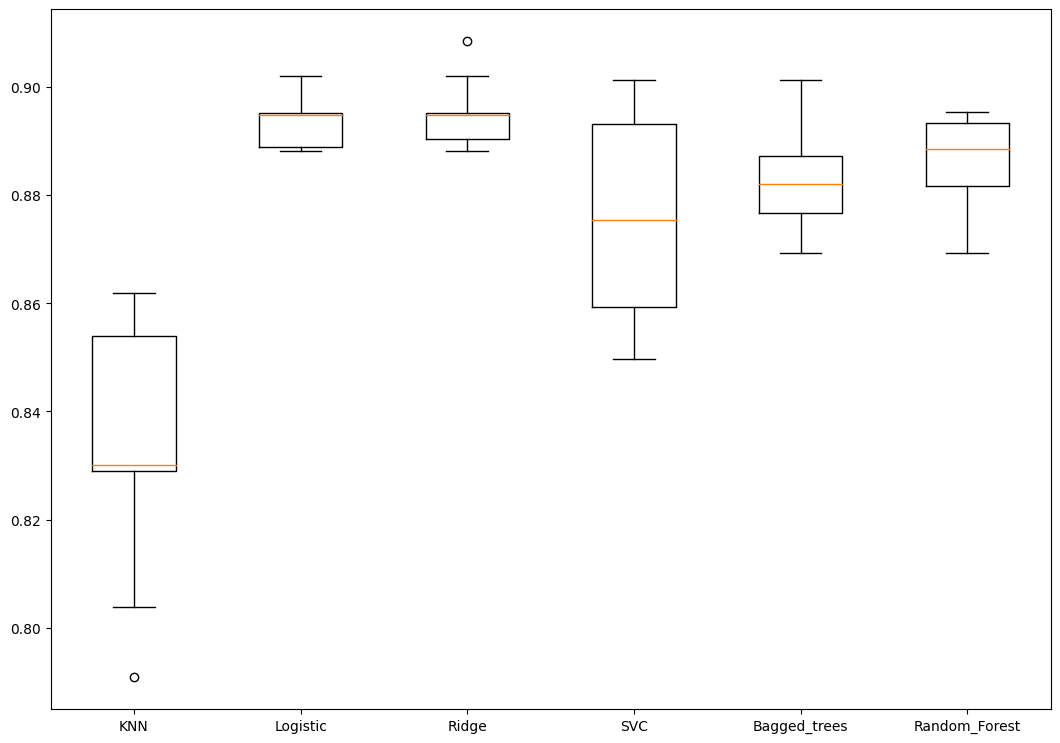

In [71]:
from sklearn.model_selection import cross_val_score

X_processed = preprocessor.fit_transform(X) # fit and transform X_train

all_scores = []
name_models = []
for name, model in models:
    scores = cross_val_score(model, X_processed, Y, cv=10)
    all_scores.append(scores)
    name_models.append(name)

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(all_scores)
ax.set_xticklabels(name_models)



[Text(1, 0, 'KNN'),
 Text(2, 0, 'Logistic'),
 Text(3, 0, 'Ridge'),
 Text(4, 0, 'SVC'),
 Text(5, 0, 'Bagged_trees'),
 Text(6, 0, 'Random_Forest'),
 Text(7, 0, 'stacked')]

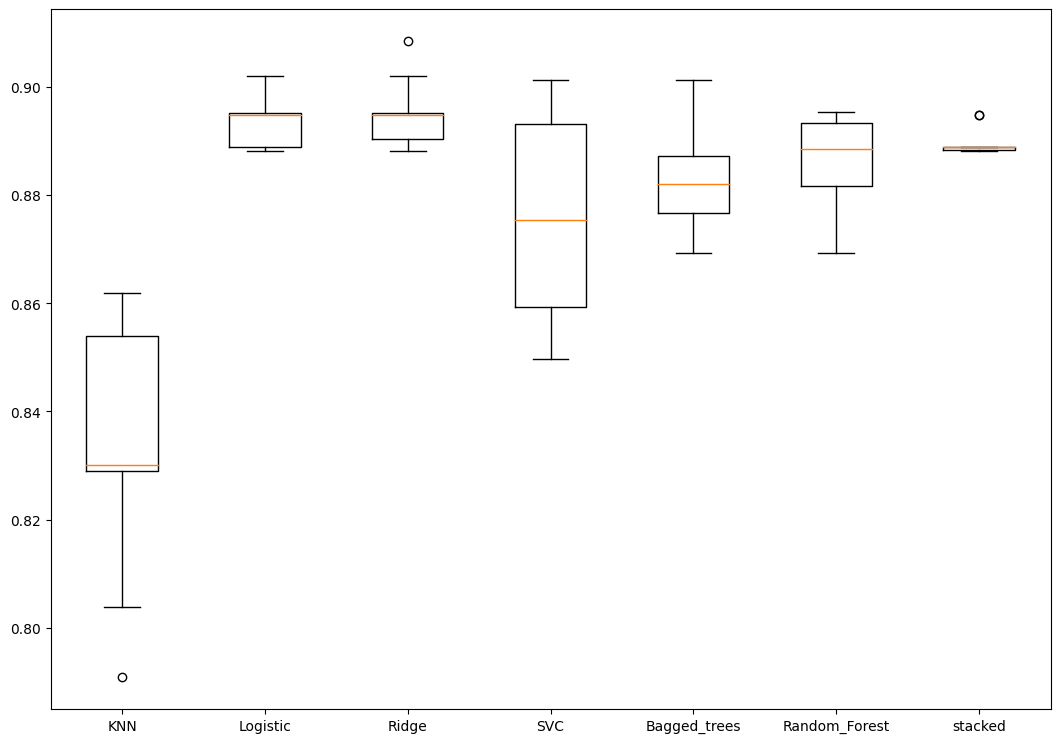

In [72]:
from sklearn.ensemble import StackingClassifier

estimators = list(models) # altho knn gives poor acc, it has best f1. Better generalisation, so leave in
clf = StackingClassifier(estimators=estimators, final_estimator=linear_model.LogisticRegression())
scores = cross_val_score(clf, X_processed, Y, cv=10)
all_scores.append(scores)
name_models.append("stacked")

fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
bp = ax.boxplot(all_scores)
ax.set_xticklabels(name_models)



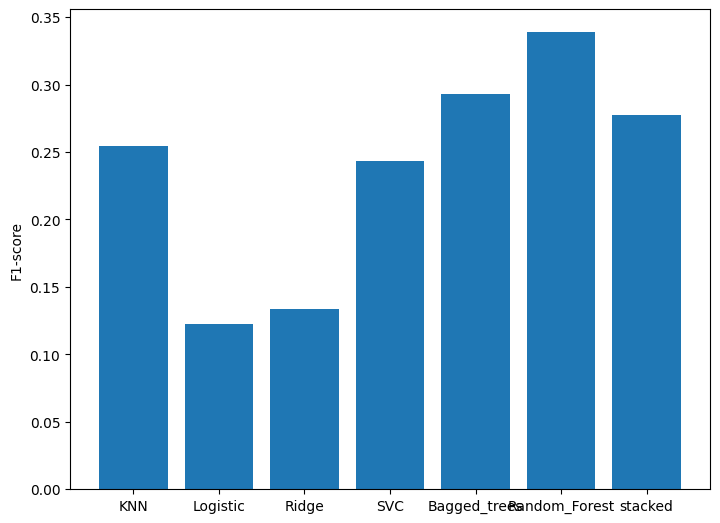

In [74]:
from sklearn.metrics import f1_score

f1_scores = []

for name, model in models:
    m = model.fit(X_train_processed, Y_train)
    Y_pred = m.predict(X_test_processed)
    f1_scores.append(f1_score(Y_test, Y_pred))

stacked = clf.fit(X_train_processed, Y_train)
Y_pred = stacked.predict(X_test_processed)
f1_scores.append(f1_score(Y_test, Y_pred))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(name_models,f1_scores)
plt.ylabel("F1-score")
plt.show()

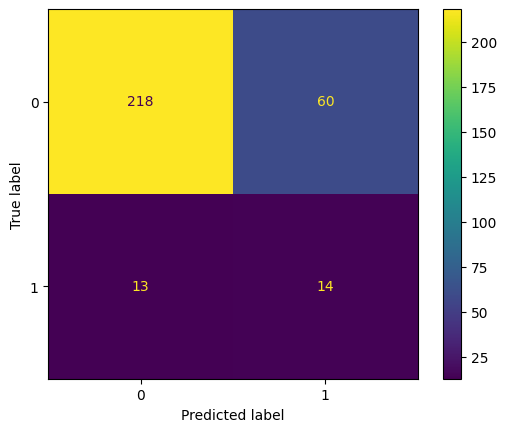

              precision    recall  f1-score   support

           0       0.94      0.78      0.86       278
           1       0.19      0.52      0.28        27

    accuracy                           0.76       305
   macro avg       0.57      0.65      0.57       305
weighted avg       0.88      0.76      0.81       305



In [75]:
Y_pred = stacked.predict(X_test_processed)

cm = metrics.confusion_matrix(Y_test, Y_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

print(metrics.classification_report(Y_test, Y_pred))
